# DS - Assignment 2

This assignment includes questions about data cleaning, extraction and manipulation using Pandas. You will be using an interesting dataset, containing information about national flags. The dataset gets loaded in a dataframe when you run the first cell, and then you can proceed with the questions. 

**For specific information about the dataset, take a look here: https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.names. Answer the questions bellow, and print the results.**


*You will need an additional library for this assignment, so before starting use the following command, as you did before:*

*pip install requests*

In [1]:
# https://campus.datacamp.com/courses/pandas-foundations/data-ingestion-inspection?ex=14
# Then it hits the paywall...?
# Run the following code to import the dataset to the df (dataframe)
# Do not change this cell!
%matplotlib inline
import pandas as pd
import requests
import io

csv = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data').content
df = pd.read_csv(io.StringIO(csv.decode('utf-8')), header=None)

In [2]:
# Question 1: Print the total number of rows and columns of the dataset, 
# as well as the first few rows (using the specified method for that)
print "rows: %d" % len(df.index)
print "columns: %d" % len(df.columns)
print "or both:"
print "rows: %d, columns %d" % df.shape
print df.info()
df.head(2)

rows: 194
columns: 30
or both:
rows: 194, columns 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
0     194 non-null object
1     194 non-null int64
2     194 non-null int64
3     194 non-null int64
4     194 non-null int64
5     194 non-null int64
6     194 non-null int64
7     194 non-null int64
8     194 non-null int64
9     194 non-null int64
10    194 non-null int64
11    194 non-null int64
12    194 non-null int64
13    194 non-null int64
14    194 non-null int64
15    194 non-null int64
16    194 non-null int64
17    194 non-null object
18    194 non-null int64
19    194 non-null int64
20    194 non-null int64
21    194 non-null int64
22    194 non-null int64
23    194 non-null int64
24    194 non-null int64
25    194 non-null int64
26    194 non-null int64
27    194 non-null int64
28    194 non-null object
29    194 non-null object
dtypes: int64(26), object(4)
memory usage: 45.5+ KB
None


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red


In [3]:
# Question 2: This dataset does not contain any labels. The list bellow 
# contains the labels in the correct order. Find a way to add them to the dataframe,
# and then print the first few rows again to show the labels.
labels = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 
          'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 
          'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']
df.columns = labels
df.head(2)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red


In [4]:
# Question 3: Check if the dataset has any NaNs, and if so, show the lines that do.
import numpy as np
df.isnull().values.any() # you prove there are no np.nan in the df
df[df.isnull().any(axis=1)]

# add some nan values and they get returned
df2 = df
df2.iloc[::3, -1] = np.nan
df2[df2.isnull().any(axis=1)]


,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,NaN
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,NaN
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,NaN
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,NaN
12,Bahamas,1,4,19,0,1,1,0,3,3,...,0,0,0,0,1,0,0,0,blue,NaN
15,Barbados,1,4,0,0,1,1,3,0,3,...,0,0,0,0,0,1,0,0,blue,NaN
18,Benin,4,1,113,3,3,5,0,0,2,...,0,0,1,0,0,0,0,0,green,NaN
21,Bolivia,2,3,1099,6,2,0,0,3,3,...,0,0,0,0,0,0,0,0,red,NaN
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,NaN
27,Burkina,4,4,274,7,3,5,0,2,3,...,0,0,1,0,0,0,0,0,red,NaN


In [5]:
# Question 4: As you can see in the link provided above, the landmass label has 6 values, that correspond to:
# 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania. Replace the landmass column values, 
# with their names from the list above
int_to_name = {1: "N.America", 2: "S.America", 3: "Europe", 4: "Africa", 5: "Asia", 6: "Oceania"}
df = df.replace({'landmass': int_to_name})
df

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,Asia,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,NaN
1,Albania,Europe,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,Africa,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,Oceania,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,NaN
4,Andorra,Europe,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,Africa,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,N.America,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,NaN
7,Antigua-Barbuda,N.America,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,S.America,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,S.America,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,NaN


In [6]:
# Question 5: The area is in 'in thousands of square km'. Transform it in square km.
df.area = df.area * 1000
df.area

0        648000
1         29000
2       2388000
3             0
4             0
5       1247000
6             0
7             0
8       2777000
9       2777000
10      7690000
11        84000
12        19000
13         1000
14       143000
15            0
16        31000
17        23000
18       113000
19            0
20        47000
21      1099000
22       600000
23      8512000
24            0
25         6000
26       111000
27       274000
28       678000
29        28000
         ...   
164       17000
165      450000
166       41000
167      185000
168       36000
169      945000
170      514000
171       57000
172        1000
173        5000
174      164000
175      781000
176           0
177           0
178       84000
179      236000
180      245000
181      178000
182           0
183     9363000
184    22402000
185       15000
186           0
187      912000
188      333000
189        3000
190      256000
191      905000
192      753000
193      391000
Name: area, Length: 194,

In [7]:
# Questions 6-9: Find all the flags that:
# - have a population of more than 100 million people (inclusive)
# - have an area of less than 1000 square km
# - have NO bars and NO stripes
# - are in Oceania
df.loc[(df.population >= 100)]
df.loc[(df.area < 1000)]
df.loc[(df.bars == 0) & (df.stripes == 0)]
df.loc[(df.landmass == 'Oceania')]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
3,American-Samoa,Oceania,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,NaN
10,Australia,Oceania,2,7690000,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue
41,Cook-Islands,Oceania,3,0,0,1,1,0,0,4,...,1,1,15,0,0,0,0,0,white,blue
57,Fiji,Oceania,2,18000,1,1,1,0,0,7,...,1,1,0,0,0,1,1,0,white,NaN
61,French-Polynesia,Oceania,3,4000,0,3,0,0,3,5,...,0,0,1,0,0,1,0,0,red,red
71,Guam,Oceania,1,0,0,1,1,0,0,7,...,0,0,0,0,0,1,1,1,red,red
82,Indonesia,Oceania,2,1904000,157,10,2,0,2,2,...,0,0,0,0,0,0,0,0,red,white
94,Kiribati,Oceania,1,0,0,1,1,0,0,4,...,0,0,1,0,0,1,1,0,red,blue
109,Marianas,Oceania,1,0,0,10,1,0,0,3,...,0,0,1,0,0,1,0,0,blue,blue
113,Micronesia,Oceania,1,1000,0,10,1,0,0,2,...,0,0,4,0,0,0,0,0,blue,blue


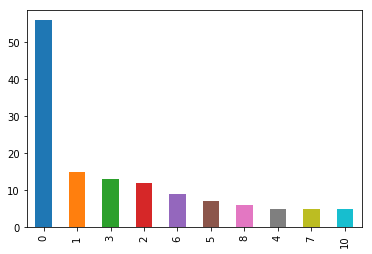

In [8]:
# Question 10: Find the population counts of the countries 
# (this means, the number of countries that had 3 million people, 10 million people, etc, using only existing values)
# and plot a bar chart of the 10 first results.
# df.iloc[0:10].population.plot(kind='bar', figsize=(15, 10), legend=True)

df.population.value_counts().head(10).plot(kind='bar')

# HINT: Remember that pandas has its own simple plot() function, and that you need a bar chart.
# Also try to find the pandas function that returns the counts, do not do it by hand!
# df.population.value_counts()

#### Project

Imagine we need to use this dataset for some machine learning purposes. And in the real world, 80% of the job is cleaning and transforming the data.

We need to create a way to show which color combinations are the most common. To simplify it, we will do it just in pairs, so we will only check the colors by 2 e.g red-white, red-blue, red-gold, etc. Then we will find the top 5 combinations and plot them in a bar chart.

##### General instructions:
 - Create a new dataframe keeping only the color labels.
 - Add new columns in this dataframe by combining the features by 2. DO NOT duplicate the data, e.g red-gold is the same as gold-red, so you need to check for this when creating the dataframe
 - If a combination exists in the dataframe, add 1 to the combination column.
 - Plot the top 5 combinations.
 
*Important! Do not do the pairs by hand, as in most cases you can have datasets of hundreds of features so this is not feasible. Automate the procedure of pairing, and checking if the pair exists.*


In [11]:
import itertools
colors = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange']
pairs = list(itertools.combinations(colors, 2))

# if columns can't be tuples
# new_column_headers = ["-".join(pair) for pair in pairs]

color_df = df[colors]

pd.concat([color_df ,pd.DataFrame(columns=pairs)])